# The Spark Foundation #GRIPMAY2021

# Task 2 - Prediction Using Unsupervised ML

By


# Dinesh Kumaran R

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans


#Redriving the Datasets

In [4]:
iris = pd.read_csv('E:\\Iris.csv')
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
%matplotlib inline


Get the Specific values from the data sets

In [14]:
x = iris.iloc[:, [ 1, 2, 3]].values
wcss = []

# Find the number of Cludters using Elbow method

In [15]:
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++',
	max_iter = 300, n_init = 10, random_state = 0)
	kmeans.fit(x)
	wcss.append(kmeans.inertia_)

Visiualize the elbow method using Metplotlib

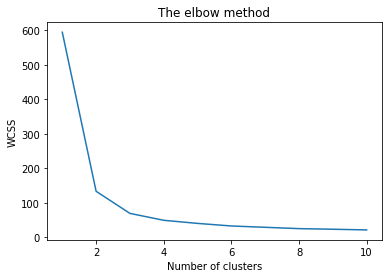

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

## From this we choose the number of clusters as '3'.


### Applying kmeans to the dataset / Creating the kmeans classifier

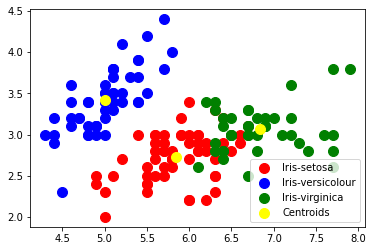

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()